In [16]:
import pandas as pd
import numpy as np
import copy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import matthews_corrcoef    
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score,roc_curve,auc
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from scipy import stats
from sklearn.model_selection import RandomizedSearchCV

#from sklearn import cross_validation
sns.set(style="ticks", color_codes=True)

In [17]:
df = pd.read_csv("combined_dataset.csv")
df.head()

,domain,ranking,isIp,valid,activeDuration,urlLen,is@,isredirect,haveDash,domainLen,nosOfSubdomain,label
0,www.voting-yahoo.com,10000000,0,0,0,20,0,0,1,20,2,1
1,www.zvon.org/xxl/WSDL1.1/Output/index.html,194914,0,1,7305,42,0,0,0,12,2,0
2,tecportais.com/file-security-update-infonfmati...,10000000,0,0,0,155,0,0,0,14,1,1
3,bima.astro.umd.edu/nemo/linuxastro/,7001,0,0,0,35,0,0,0,18,3,0
4,huarui-tec.com/js/?us.battle.net/login/en/?ref...,10000000,0,1,730,79,0,0,1,14,1,1


In [18]:
inputs = df.drop(['label', 'domain'], axis=1)
outputs = df.label

In [19]:
x_train, x_test, y_train, y_test = train_test_split(inputs, outputs, test_size=0.25)
print("Training set has {} samples.".format(x_train.shape[0]))
print("Testing set has {} samples.".format(x_test.shape[0]))

Training set has 71932 samples.
Testing set has 23978 samples.


In [21]:
#Randomised search

clf_xgb = XGBClassifier(objective = 'binary:logistic')
param_dist = {'n_estimators': stats.randint(150, 1000),
              'learning_rate': stats.uniform(0.01, 0.6),
              'subsample': stats.uniform(0.3, 0.9),
              'max_depth': [3, 4, 5, 6, 7, 8, 9],
              'colsample_bytree': stats.uniform(0.5, 0.9),
              'min_child_weight': [1, 2, 3, 4]
             }

numFolds = 5
#kfold_5 = cross_validation.KFold(n = len(X), shuffle = True, n_folds = numFolds)

clf = RandomizedSearchCV(clf_xgb, 
                         param_distributions = param_dist,
                         cv = 5,  
                         n_iter = 5, # you want 5 here not 25 if I understand you correctly 
                         scoring = 'roc_auc', 
                         error_score = 0, 
                         verbose = 3, 
                         n_jobs = -1)

In [22]:
clf.fit(x_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  25 | elapsed:  2.0min remaining:  2.5min
[Parallel(n_jobs=-1)]: Done  20 out of  25 | elapsed:  3.0min remaining:   45.5s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  5.1min finished
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:37:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5, error_score=0,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_e...
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001EFEAABB688>,
                                        'max_de

In [23]:
pred=clf.predict(x_test)
pred

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

In [13]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [14]:
print("f1 score is ",f1_score(y_test,pred,average='weighted'))
print("matthews correlation coefficient is ",matthews_corrcoef(y_test,pred))
print("The accuracy of XGBoost on testing data is: ",100.0 *accuracy_score(y_test,pred))

f1 score is  0.9481202993959147
matthews correlation coefficient is  0.8930334193210009
The accuracy of XGBoost on testing data is:  94.8160814079573


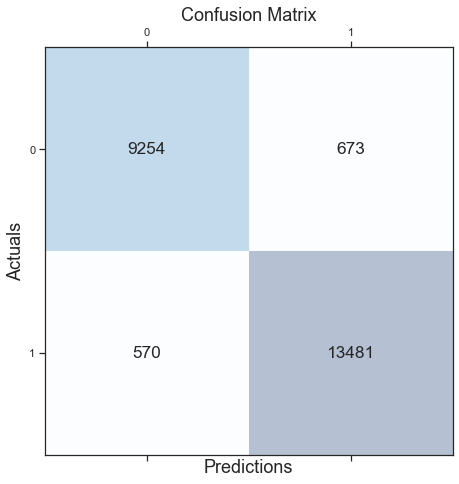

In [15]:
cm=confusion_matrix(y_test,pred)
# sns.heatmap(cm,annot=True)
# print(cm)
conf_matrix = confusion_matrix(y_true=y_test, y_pred=pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [16]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94      9927
           1       0.95      0.96      0.96     14051

    accuracy                           0.95     23978
   macro avg       0.95      0.95      0.95     23978
weighted avg       0.95      0.95      0.95     23978



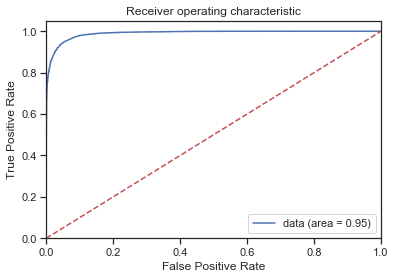

In [17]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, xgb.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, xgb.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='data (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()